In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve
from sklearn.metrics import recall_score, classification_report, auc, roc_curve,confusion_matrix,accuracy_score, auc

from sklearn.metrics import precision_recall_fscore_support, f1_score, mean_squared_error
from sklearn.preprocessing import StandardScaler

from pylab import rcParams
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
from tensorflow import keras
from keras import Sequential
from keras.layers import Flatten, Dense, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPool1D
from keras.optimizers import Adam
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

import os


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import preprocessing, metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from keras import backend as K
from keras.models import Model
from keras.layers import Input, Dense, Lambda, BatchNormalization
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras import regularizers
from sklearn.utils import shuffle

import imblearn
from imblearn.over_sampling import ADASYN

from sklearn.model_selection import StratifiedKFold

import time 

start_time = time.time()


Using TensorFlow backend.
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.bagging module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)
F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.ensemble.base module is  deprecated in version 0.22 and will be removed in version 0.24

In [2]:
# Read the dataset
df = pd.read_csv('F:creditcard.csv')
#check on the size of the dataframe

from sklearn.utils import shuffle
df= shuffle(df)

In [3]:
# We separate the feature vector from the classification result
X = df.drop('Class',axis=1).values
y = df['Class'].values

In [4]:
# Feature scaling
X -= X.min(axis=0)
X /= X.max(axis=0)

In [5]:
#Separation of data into training & test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#print("Number transactions X_train dataset: ", X_train.shape)
#print("Number transactions y_train dataset: ", y_train.shape)
#print("Number transactions X_test dataset: ", X_test.shape)
#print("Number transactions y_test dataset: ", y_test.shape)

Fold #1
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511774, 30)
After OverSampling, the shape of train_y: (511774,) 

After OverSampling, counts of label '1': 255891
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 21s 81us/step - loss: 0.0014 - val_loss: 2.7967e-04
Epoch 2/150
256326/256326 [==============================] - 20s 79us/step - loss: 2.0652e-04 - val_loss: 1.5862e-04
Epoch 3/150
256326/256326 [==============================] - 20s 79us/step - loss: 1.4082e-04 - val_loss: 1.2674e-04
Epoch 4/150
256326/256326 [==============================] - 20s 79us/step - loss: 1.2061e-04 - val_loss: 1.2682e-04
Epoch 5/150
256326/256326 [==============================] - 20s 79us/step - loss: 1.1302e-04 - val_loss: 1.1488e-04
Epoch 6/150
256326/256326 [==============================] - 20s 79us/step - loss: 9.5163e-05 - val_loss: 8.6003e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 20s 78us/step - loss: 3.8457e-05 - val_loss: 3.8101e-05
Epoch 69/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.8517e-05 - val_loss: 3.9921e-05
Epoch 70/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.8749e-05 - val_loss: 3.9510e-05
Epoch 71/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.8203e-05 - val_loss: 4.8344e-05
Epoch 72/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.8268e-05 - val_loss: 4.2079e-05
Epoch 73/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.8016e-05 - val_loss: 3.4954e-05
Epoch 74/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.7662e-05 - val_loss: 4.3404e-05
Epoch 75/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.7819e-05 - val_loss: 3.4303e-05
Epoch 76/150
256326/256326 [==============================] - 20s 78u

256326/256326 [==============================] - 18s 70us/step - loss: 3.1541e-05 - val_loss: 3.7142e-05
Epoch 138/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.1506e-05 - val_loss: 4.0439e-05
Epoch 139/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.1307e-05 - val_loss: 3.1222e-05
Epoch 140/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1064e-05 - val_loss: 1.0101e-04
Epoch 141/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1183e-05 - val_loss: 3.6444e-05
Epoch 142/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1180e-05 - val_loss: 2.8493e-05
Epoch 143/150
256326/256326 [==============================] - 18s 71us/step - loss: 3.1123e-05 - val_loss: 3.5514e-05
Epoch 144/150
256326/256326 [==============================] - 18s 70us/step - loss: 3.1118e-05 - val_loss: 3.3569e-05
Epoch 145/150
256326/256326 [==============================] -

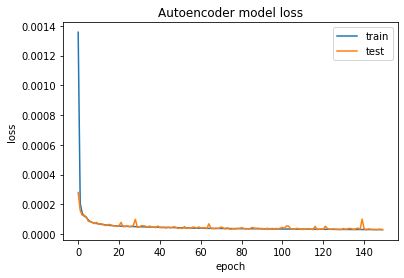

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 46s 180us/step - loss: 0.0226 - accuracy: 0.9947 - val_loss: 0.0057 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0072 - accuracy: 0.9989 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 45s 174us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 45s 175us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 46s 178us/step - loss: 0.0046 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

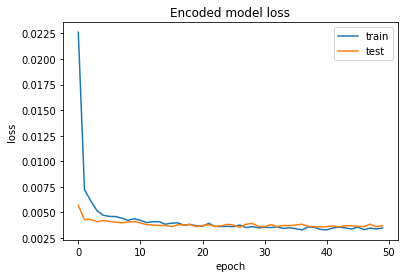

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679997191109


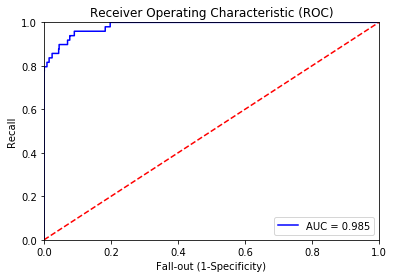

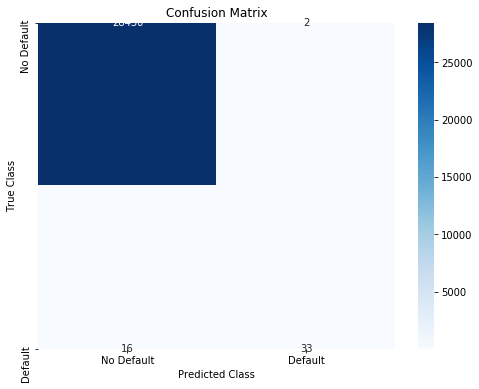

AUC(ROC): 0.8366995222399596
Precision: 0.9428571428571428
Recall: 0.673469387755102
F1 score: 0.7857142857142857
False positives: 2
True positives: 33
False negatives: 16
True negatives: 28430
Fold #2
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511812, 30)
After OverSampling, the shape of train_y: (511812,) 

After OverSampling, counts of label '1': 255929
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 19s 75us/step - loss: 0.0016 - val_loss: 3.0771e-04
Epoch 2/150
256326/256326 [==============================] - 19s 73us/step - loss: 2.2869e-04 - val_loss: 1.7128e-04
Epoch 3/150
256326/256326 [==============================] - 19s 73us/step - loss: 1.3808e-04 - val_loss: 1.2660e-04
Epoch 4/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.2162e-04 - val_loss: 1.2369e-04
Epoch 5/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.1262e-04 - val_loss: 1.1176e-04
Epoch 6/150
256326/256326 [==============================] - 19s 72us/step - loss: 1.0343e-04 - val_loss: 9.9927e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 22s 84us/step - loss: 3.6621e-05 - val_loss: 3.5644e-05
Epoch 69/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.6337e-05 - val_loss: 4.0916e-05
Epoch 70/150
256326/256326 [==============================] - 22s 84us/step - loss: 3.5755e-05 - val_loss: 3.9642e-05
Epoch 71/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.5724e-05 - val_loss: 3.7472e-05
Epoch 72/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.5447e-05 - val_loss: 3.5900e-05
Epoch 73/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.5035e-05 - val_loss: 4.2918e-05
Epoch 74/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.5035e-05 - val_loss: 3.6456e-05
Epoch 75/150
256326/256326 [==============================] - 20s 80us/step - loss: 3.4783e-05 - val_loss: 1.4232e-04
Epoch 76/150
256326/256326 [==============================] - 21s 82u

256326/256326 [==============================] - 20s 79us/step - loss: 3.3810e-05 - val_loss: 3.8568e-05
Epoch 138/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.3326e-05 - val_loss: 3.4970e-05
Epoch 139/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.3461e-05 - val_loss: 3.5667e-05
Epoch 140/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.3296e-05 - val_loss: 3.9018e-05
Epoch 141/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.3292e-05 - val_loss: 3.7523e-05
Epoch 142/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.3096e-05 - val_loss: 3.6916e-05
Epoch 143/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.2926e-05 - val_loss: 4.0854e-05
Epoch 144/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.2871e-05 - val_loss: 3.7122e-05
Epoch 145/150
256326/256326 [==============================] -

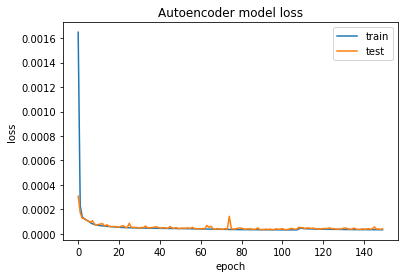

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0301 - accuracy: 0.9923 - val_loss: 0.0047 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 47s 185us/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 47s 185us/step - loss: 0.0059 - accuracy: 0.9989 - val_loss: 0.0036 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 47s 185us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0034 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 47s 184us/step - loss: 0.0052 - accuracy: 0.9992 - val_loss: 0.0034 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 47s 185us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0031 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

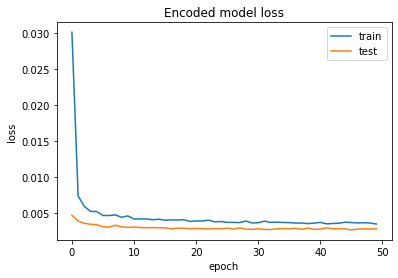

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.999403110845827


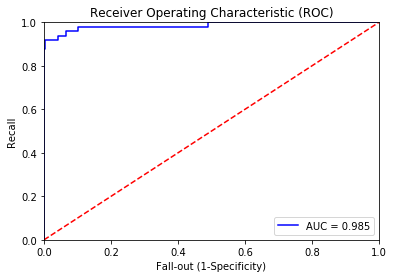

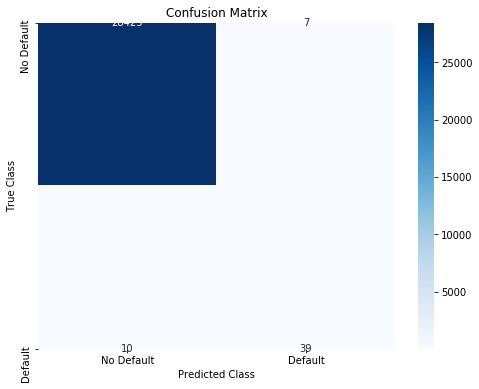

AUC(ROC): 0.8978360829418993
Precision: 0.8478260869565217
Recall: 0.7959183673469388
F1 score: 0.8210526315789473
False positives: 7
True positives: 39
False negatives: 10
True negatives: 28425
Fold #3
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511706, 30)
After OverSampling, the shape of train_y: (511706,) 

After OverSampling, counts of label '1': 255823
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 22s 87us/step - loss: 0.0017 - val_loss: 3.2698e-04
Epoch 2/150
256326/256326 [==============================] - 22s 85us/step - loss: 2.0378e-04 - val_loss: 1.4330e-04
Epoch 3/150
256326/256326 [==============================] - 22s 85us/step - loss: 1.3701e-04 - val_loss: 1.2833e-04
Epoch 4/150
256326/256326 [==============================] - 22s 85us/step - loss: 1.1871e-04 - val_loss: 1.0993e-04
Epoch 5/150
256326/256326 [==============================] - 21s 83us/step - loss: 1.0779e-04 - val_loss: 9.8920e-05
Epoch 6/150
256326/256326 [==============================] - 22s 86us/step - loss: 1.0073e-04 - val_loss: 1.0389e-04
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 21s 82us/step - loss: 3.6949e-05 - val_loss: 3.9799e-05
Epoch 69/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.7552e-05 - val_loss: 8.1231e-05
Epoch 70/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.6559e-05 - val_loss: 3.6925e-05
Epoch 71/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.6600e-05 - val_loss: 3.4840e-05
Epoch 72/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.6738e-05 - val_loss: 4.0420e-05
Epoch 73/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.6327e-05 - val_loss: 4.0598e-05
Epoch 74/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.6379e-05 - val_loss: 3.1702e-05
Epoch 75/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.6437e-05 - val_loss: 3.7364e-05
Epoch 76/150
256326/256326 [==============================] - 21s 82u

256326/256326 [==============================] - 20s 80us/step - loss: 3.2719e-05 - val_loss: 3.2490e-05
Epoch 138/150
256326/256326 [==============================] - 20s 80us/step - loss: 3.2821e-05 - val_loss: 3.1410e-05
Epoch 139/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.2351e-05 - val_loss: 3.7174e-05
Epoch 140/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.2787e-05 - val_loss: 2.8932e-05
Epoch 141/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.2579e-05 - val_loss: 3.1266e-05
Epoch 142/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.2597e-05 - val_loss: 2.8435e-05
Epoch 143/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.2968e-05 - val_loss: 3.2439e-05
Epoch 144/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.2439e-05 - val_loss: 9.9402e-05
Epoch 145/150
256326/256326 [==============================] -

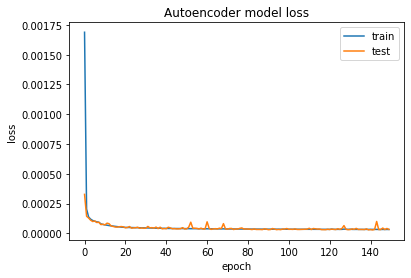

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 52s 201us/step - loss: 0.0252 - accuracy: 0.9947 - val_loss: 0.0046 - val_accuracy: 0.9988
Epoch 2/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0077 - accuracy: 0.9984 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 3/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.0030 - val_accuracy: 0.9996
Epoch 4/50
256326/256326 [==============================] - 49s 191us/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0027 - val_accuracy: 0.9996
Epoch 5/50
256326/256326 [==============================] - 50s 194us/step - loss: 0.0055 - accuracy: 0.9991 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 6/50
256326/256326 [==============================] - 50s 194us/step - loss: 0.0052 - accuracy: 0.9991 - val_loss: 0.0024 - val_accuracy: 0.9996
Epoch 7/50
256326/256326 [=================

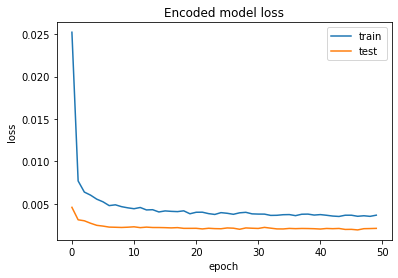

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995786664794073


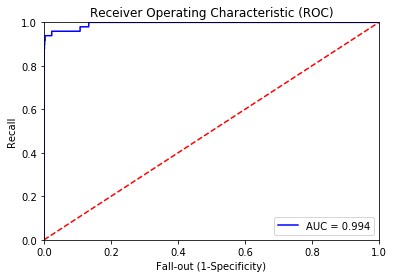

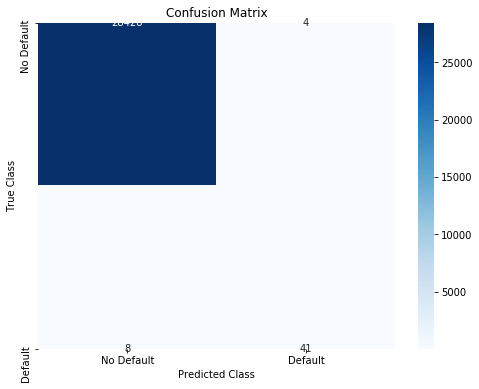

AUC(ROC): 0.9182970036635926
Precision: 0.9111111111111111
Recall: 0.8367346938775511
F1 score: 0.8723404255319148
False positives: 4
True positives: 41
False negatives: 8
True negatives: 28428
Fold #4
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511714, 30)
After OverSampling, the shape of train_y: (511714,) 

After OverSampling, counts of label '1': 255831
After OverSampling, counts of label '0': 255883
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 22s 87us/step - loss: 0.0013 - val_loss: 3.0199e-04
Epoch 2/150
256326/256326 [==============================] - 21s 84us/step - loss: 2.2649e-04 - val_loss: 1.7149e-04
Epoch 3/150
256326/256326 [==============================] - 21s 83us/step - loss: 1.4183e-04 - val_loss: 1.4591e-04
Epoch 4/150
256326/256326 [==============================] - 21s 84us/step - loss: 1.2080e-04 - val_loss: 1.2593e-04
Epoch 5/150
256326/256326 [==============================] - 21s 83us/step - loss: 1.1030e-04 - val_loss: 1.0920e-04
Epoch 6/150
256326/256326 [==============================] - 21s 82us/step - loss: 9.9086e-05 - val_loss: 9.5380e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 21s 83us/step - loss: 3.9438e-05 - val_loss: 4.2602e-05
Epoch 69/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.9276e-05 - val_loss: 3.7150e-05
Epoch 70/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.8903e-05 - val_loss: 3.5427e-05
Epoch 71/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.8748e-05 - val_loss: 3.7615e-05
Epoch 72/150
256326/256326 [==============================] - 21s 80us/step - loss: 3.8388e-05 - val_loss: 1.0912e-04
Epoch 73/150
256326/256326 [==============================] - 20s 80us/step - loss: 3.8962e-05 - val_loss: 4.1798e-05
Epoch 74/150
256326/256326 [==============================] - 21s 81us/step - loss: 3.8432e-05 - val_loss: 4.8109e-05
Epoch 75/150
256326/256326 [==============================] - 21s 84us/step - loss: 3.8538e-05 - val_loss: 4.5128e-05
Epoch 76/150
256326/256326 [==============================] - 21s 84u

256326/256326 [==============================] - 20s 79us/step - loss: 3.4791e-05 - val_loss: 3.4259e-05
Epoch 138/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.4454e-05 - val_loss: 3.1444e-05
Epoch 139/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.4446e-05 - val_loss: 4.6417e-05
Epoch 140/150
256326/256326 [==============================] - 20s 78us/step - loss: 3.4667e-05 - val_loss: 3.2328e-05
Epoch 141/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.4372e-05 - val_loss: 6.6958e-05
Epoch 142/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.4965e-05 - val_loss: 3.4381e-05
Epoch 143/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.4051e-05 - val_loss: 3.4723e-05
Epoch 144/150
256326/256326 [==============================] - 20s 79us/step - loss: 3.4092e-05 - val_loss: 4.2852e-05
Epoch 145/150
256326/256326 [==============================] -

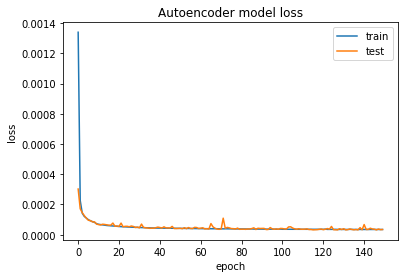

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0357 - accuracy: 0.9899 - val_loss: 0.0051 - val_accuracy: 0.9991
Epoch 2/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0076 - accuracy: 0.9986 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 3/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0045 - val_accuracy: 0.9993
Epoch 4/50
256326/256326 [==============================] - 53s 205us/step - loss: 0.0060 - accuracy: 0.9990 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 52s 202us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0037 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

256326/256326 [==============================] - 24s 93us/step - loss: 3.5393e-05 - val_loss: 3.5590e-05
Epoch 77/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.5320e-05 - val_loss: 4.0134e-05
Epoch 78/150
256326/256326 [==============================] - 23s 92us/step - loss: 3.5016e-05 - val_loss: 3.3452e-05
Epoch 79/150
256326/256326 [==============================] - 24s 92us/step - loss: 3.5136e-05 - val_loss: 3.3616e-05
Epoch 80/150
256326/256326 [==============================] - 24s 92us/step - loss: 3.5107e-05 - val_loss: 3.9331e-05
Epoch 81/150
256326/256326 [==============================] - 24s 92us/step - loss: 3.4882e-05 - val_loss: 3.5712e-05
Epoch 82/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.4753e-05 - val_loss: 6.9346e-05
Epoch 83/150
256326/256326 [==============================] - 24s 93us/step - loss: 3.4718e-05 - val_loss: 3.3025e-05
Epoch 84/150
256326/256326 [==============================] - 24s 94u

256326/256326 [==============================] - 21s 83us/step - loss: 2.9197e-05 - val_loss: 2.7296e-05
Epoch 146/150
256326/256326 [==============================] - 21s 84us/step - loss: 2.9123e-05 - val_loss: 3.0567e-05
Epoch 147/150
256326/256326 [==============================] - 21s 84us/step - loss: 2.9073e-05 - val_loss: 2.5504e-05
Epoch 148/150
256326/256326 [==============================] - 21s 83us/step - loss: 2.9137e-05 - val_loss: 3.7993e-05
Epoch 149/150
256326/256326 [==============================] - 21s 84us/step - loss: 2.9264e-05 - val_loss: 2.9921e-05
Epoch 150/150
256326/256326 [==============================] - 22s 84us/step - loss: 2.9092e-05 - val_loss: 3.3126e-05


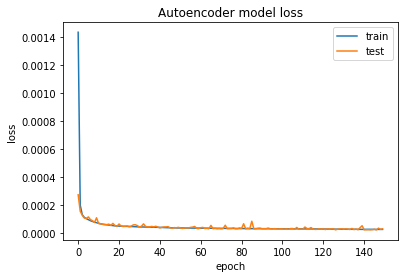

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0381 - accuracy: 0.9901 - val_loss: 0.0050 - val_accuracy: 0.9993
Epoch 2/50
256326/256326 [==============================] - 51s 197us/step - loss: 0.0070 - accuracy: 0.9989 - val_loss: 0.0046 - val_accuracy: 0.9994
Epoch 3/50
256326/256326 [==============================] - 51s 197us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 4/50
256326/256326 [==============================] - 51s 198us/step - loss: 0.0057 - accuracy: 0.9991 - val_loss: 0.0042 - val_accuracy: 0.9994
Epoch 5/50
256326/256326 [==============================] - 50s 197us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0041 - val_accuracy: 0.9994
Epoch 6/50
256326/256326 [==============================] - 51s 197us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 7/50
256326/256326 [=================

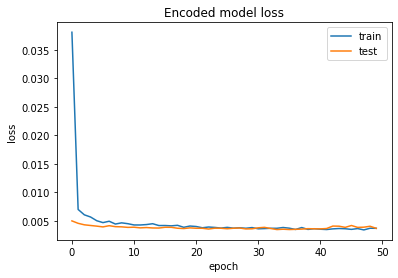

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9993679997191109


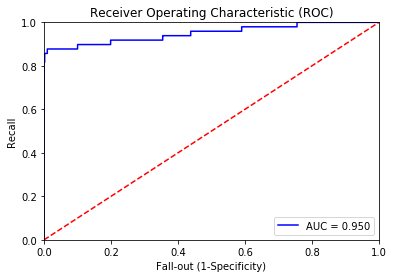

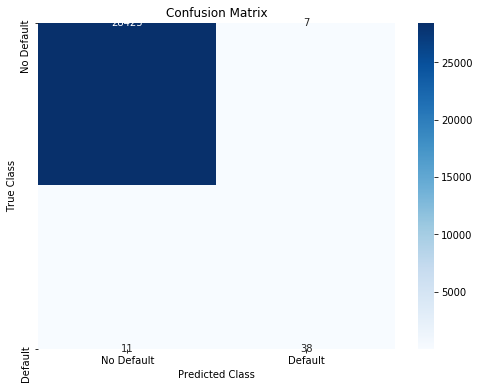

AUC(ROC): 0.8876320013092462
Precision: 0.8444444444444444
Recall: 0.7755102040816326
F1 score: 0.8085106382978723
False positives: 7
True positives: 38
False negatives: 11
True negatives: 28425
Fold #6
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511795, 30)
After OverSampling, the shape of train_y: (511795,) 

After OverSampling, counts of label '1': 255911
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 25s 97us/step - loss: 0.0014 - val_loss: 2.5306e-04
Epoch 2/150
256326/256326 [==============================] - 24s 94us/step - loss: 1.8280e-04 - val_loss: 1.5077e-04
Epoch 3/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.2818e-04 - val_loss: 1.1514e-04
Epoch 4/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.1306e-04 - val_loss: 1.3441e-04
Epoch 5/150
256326/256326 [==============================] - 24s 93us/step - loss: 1.0057e-04 - val_loss: 9.2215e-05
Epoch 6/150
256326/256326 [==============================] - 23s 91us/step - loss: 8.8487e-05 - val_loss: 8.9893e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 23s 88us/step - loss: 3.7810e-05 - val_loss: 3.4298e-05
Epoch 70/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.7453e-05 - val_loss: 3.7957e-05
Epoch 71/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.7493e-05 - val_loss: 4.1268e-05
Epoch 72/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.7189e-05 - val_loss: 3.6732e-05
Epoch 73/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.7306e-05 - val_loss: 3.3976e-05
Epoch 74/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.7009e-05 - val_loss: 3.8948e-05
Epoch 75/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.7144e-05 - val_loss: 4.1301e-05
Epoch 76/150
256326/256326 [==============================] - 23s 89us/step - loss: 3.6834e-05 - val_loss: 4.1499e-05
Epoch 77/150
256326/256326 [==============================] - 23s 88u

256326/256326 [==============================] - 22s 87us/step - loss: 3.1440e-05 - val_loss: 3.0722e-05
Epoch 142/150
256326/256326 [==============================] - 21s 83us/step - loss: 3.1257e-05 - val_loss: 3.0997e-05
Epoch 143/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.1398e-05 - val_loss: 3.1622e-05
Epoch 144/150
256326/256326 [==============================] - 21s 82us/step - loss: 3.1203e-05 - val_loss: 3.6796e-05
Epoch 145/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.1097e-05 - val_loss: 2.8306e-05
Epoch 146/150
256326/256326 [==============================] - 22s 87us/step - loss: 3.0818e-05 - val_loss: 3.0813e-05
Epoch 147/150
256326/256326 [==============================] - 22s 88us/step - loss: 3.0958e-05 - val_loss: 3.3439e-05
Epoch 148/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.0887e-05 - val_loss: 3.4797e-05
Epoch 149/150
256326/256326 [==============================] -

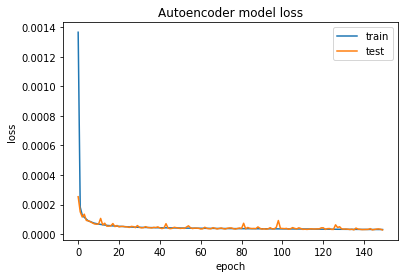

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 54s 210us/step - loss: 0.0273 - accuracy: 0.9934 - val_loss: 0.0044 - val_accuracy: 0.9990
Epoch 2/50
256326/256326 [==============================] - 53s 207us/step - loss: 0.0083 - accuracy: 0.9987 - val_loss: 0.0041 - val_accuracy: 0.9991
Epoch 3/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0066 - accuracy: 0.9988 - val_loss: 0.0035 - val_accuracy: 0.9992
Epoch 4/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0062 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 5/50
256326/256326 [==============================] - 54s 209us/step - loss: 0.0059 - accuracy: 0.9990 - val_loss: 0.0032 - val_accuracy: 0.9993
Epoch 6/50
256326/256326 [==============================] - 54s 210us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0031 - val_accuracy: 0.9993
Epoch 7/50
256326/256326 [=================

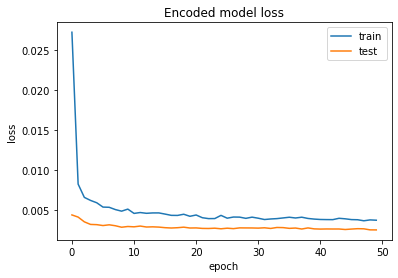

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994382219725431


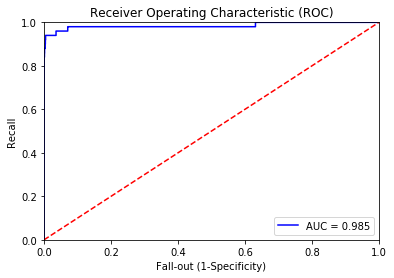

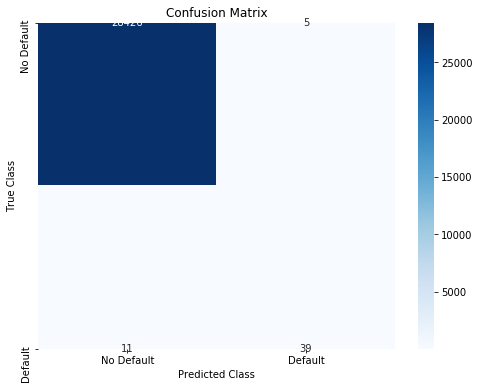

AUC(ROC): 0.8899120678133025
Precision: 0.8863636363636364
Recall: 0.78
F1 score: 0.8297872340425532
False positives: 5
True positives: 39
False negatives: 11
True negatives: 28426
Fold #7
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511745, 30)
After OverSampling, the shape of train_y: (511745,) 

After OverSampling, counts of label '1': 255861
After OverSampling, counts of label '0': 255884
Train on 256326 samples, validate on 28481 samples
Epoch 1/150
256326/256326 [==============================] - 22s 86us/step - loss: 0.0014 - val_loss: 2.9652e-04
Epoch 2/150
256326/256326 [==============================] - 22s 84us/step - loss: 2.1221e-04 - val_loss: 1.6469e-04
Epoch 3/150
256326/256326 [==============================] - 21s 84us/step - loss: 1.3969e-04 - val_loss: 1.4782e-04
Epoch 4/150
256326/256326 [==============================] - 22s 84us/step - loss: 1.2031e-04 - val_loss: 1.1598e-04
Epoch 5/150
256326/256326 [==============================] - 22s 84us/step - loss: 1.0760e-04 - val_loss: 1.0813e-04
Epoch 6/150
256326/256326 [==============================] - 22s 85us/step - loss: 9.9147e-05 - val_loss: 9.9085e-05
Epoch 7/150
256326/256326 [===================

256326/256326 [==============================] - 22s 86us/step - loss: 3.6197e-05 - val_loss: 4.2102e-05
Epoch 69/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.6577e-05 - val_loss: 3.9986e-05
Epoch 70/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.6035e-05 - val_loss: 3.8774e-05
Epoch 71/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.5933e-05 - val_loss: 5.5973e-05
Epoch 72/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.5855e-05 - val_loss: 3.8387e-05
Epoch 73/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.5959e-05 - val_loss: 3.9182e-05
Epoch 74/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.5314e-05 - val_loss: 3.3277e-05
Epoch 75/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.5161e-05 - val_loss: 3.5146e-05
Epoch 76/150
256326/256326 [==============================] - 22s 86u

256326/256326 [==============================] - 22s 86us/step - loss: 2.9967e-05 - val_loss: 2.9708e-05
Epoch 138/150
256326/256326 [==============================] - 22s 85us/step - loss: 2.9462e-05 - val_loss: 3.3570e-05
Epoch 139/150
256326/256326 [==============================] - 22s 85us/step - loss: 3.0656e-05 - val_loss: 2.9406e-05
Epoch 140/150
256326/256326 [==============================] - 22s 86us/step - loss: 2.9951e-05 - val_loss: 2.8382e-05
Epoch 141/150
256326/256326 [==============================] - 22s 86us/step - loss: 2.9449e-05 - val_loss: 3.1735e-05
Epoch 142/150
256326/256326 [==============================] - 22s 87us/step - loss: 2.9884e-05 - val_loss: 3.1381e-05
Epoch 143/150
256326/256326 [==============================] - 22s 86us/step - loss: 3.0201e-05 - val_loss: 2.6742e-05
Epoch 144/150
256326/256326 [==============================] - 22s 87us/step - loss: 2.9819e-05 - val_loss: 2.9136e-05
Epoch 145/150
256326/256326 [==============================] -

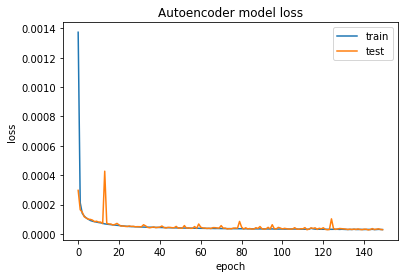

Train on 256326 samples, validate on 28481 samples
Epoch 1/50
256326/256326 [==============================] - 53s 205us/step - loss: 0.0453 - accuracy: 0.9874 - val_loss: 0.0069 - val_accuracy: 0.9992
Epoch 2/50
256326/256326 [==============================] - 52s 203us/step - loss: 0.0082 - accuracy: 0.9988 - val_loss: 0.0067 - val_accuracy: 0.9992
Epoch 3/50
256326/256326 [==============================] - 54s 209us/step - loss: 0.0067 - accuracy: 0.9989 - val_loss: 0.0058 - val_accuracy: 0.9992
Epoch 4/50
256326/256326 [==============================] - 53s 208us/step - loss: 0.0061 - accuracy: 0.9990 - val_loss: 0.0055 - val_accuracy: 0.9991
Epoch 5/50
256326/256326 [==============================] - 52s 202us/step - loss: 0.0058 - accuracy: 0.9990 - val_loss: 0.0054 - val_accuracy: 0.9991
Epoch 6/50
256326/256326 [==============================] - 52s 204us/step - loss: 0.0051 - accuracy: 0.9991 - val_loss: 0.0055 - val_accuracy: 0.9992
Epoch 7/50
256326/256326 [=================

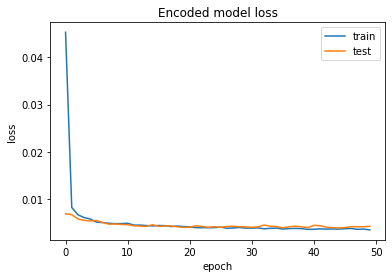

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992977774656788


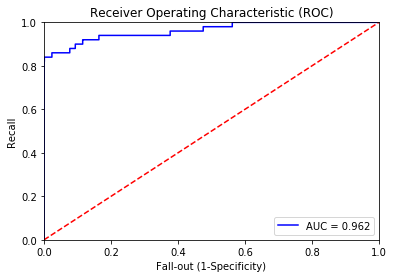

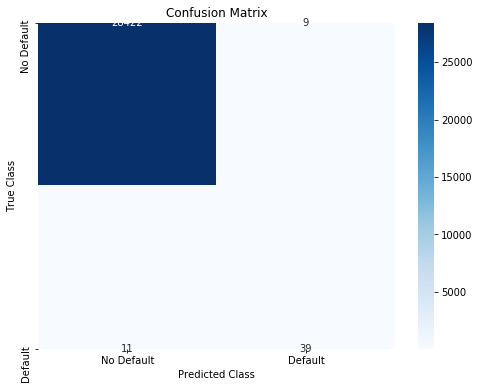

AUC(ROC): 0.8898417220639443
Precision: 0.8125
Recall: 0.78
F1 score: 0.7959183673469388
False positives: 9
True positives: 39
False negatives: 11
True negatives: 28422
Fold #8
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511784, 30)
After OverSampling, the shape of train_y: (511784,) 

After OverSampling, counts of label '1': 255900
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 23s 90us/step - loss: 0.0015 - val_loss: 2.8407e-04
Epoch 2/150
256327/256327 [==============================] - 23s 88us/step - loss: 2.1062e-04 - val_loss: 1.5758e-04
Epoch 3/150
256327/256327 [==============================] - 23s 88us/step - loss: 1.3204e-04 - val_loss: 1.2817e-04
Epoch 4/150
256327/256327 [==============================] - 23s 88us/step - loss: 1.2003e-04 - val_loss: 1.1313e-04
Epoch 5/150
256327/256327 [==============================] - 22s 88us/step - loss: 1.1043e-04 - val_loss: 1.0397e-04
Epoch 6/150
256327/256327 [==============================] - 23s 88us/step - loss: 1.0268e-04 - val_loss: 9.3594e-05
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 22s 84us/step - loss: 3.3759e-05 - val_loss: 4.0142e-05
Epoch 69/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.3934e-05 - val_loss: 4.4863e-05
Epoch 70/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.3773e-05 - val_loss: 3.2240e-05
Epoch 71/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.3513e-05 - val_loss: 4.8276e-05
Epoch 72/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.3297e-05 - val_loss: 3.1347e-05
Epoch 73/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.3075e-05 - val_loss: 4.1392e-05
Epoch 74/150
256327/256327 [==============================] - 21s 84us/step - loss: 3.3206e-05 - val_loss: 3.2914e-05
Epoch 75/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.3054e-05 - val_loss: 3.2635e-05
Epoch 76/150
256327/256327 [==============================] - 22s 84u

256327/256327 [==============================] - 22s 88us/step - loss: 2.9810e-05 - val_loss: 3.9434e-05
Epoch 138/150
256327/256327 [==============================] - 22s 88us/step - loss: 2.9824e-05 - val_loss: 3.1161e-05
Epoch 139/150
256327/256327 [==============================] - 22s 87us/step - loss: 2.9655e-05 - val_loss: 3.8283e-05
Epoch 140/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.0114e-05 - val_loss: 3.1240e-05
Epoch 141/150
256327/256327 [==============================] - 22s 84us/step - loss: 2.9757e-05 - val_loss: 3.9060e-05
Epoch 142/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.0131e-05 - val_loss: 3.0041e-05
Epoch 143/150
256327/256327 [==============================] - 22s 84us/step - loss: 2.9561e-05 - val_loss: 2.8810e-05
Epoch 144/150
256327/256327 [==============================] - 21s 83us/step - loss: 2.9501e-05 - val_loss: 1.1683e-04
Epoch 145/150
256327/256327 [==============================] -

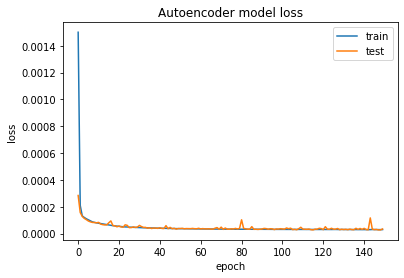

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 52s 203us/step - loss: 0.0334 - accuracy: 0.9905 - val_loss: 0.0052 - val_accuracy: 0.9993
Epoch 2/50
256327/256327 [==============================] - 51s 201us/step - loss: 0.0071 - accuracy: 0.9988 - val_loss: 0.0049 - val_accuracy: 0.9994
Epoch 3/50
256327/256327 [==============================] - 51s 200us/step - loss: 0.0060 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 51s 199us/step - loss: 0.0054 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 51s 199us/step - loss: 0.0051 - accuracy: 0.9992 - val_loss: 0.0047 - val_accuracy: 0.9993
Epoch 6/50
256327/256327 [==============================] - 51s 199us/step - loss: 0.0047 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9994
Epoch 7/50
256327/256327 [=================

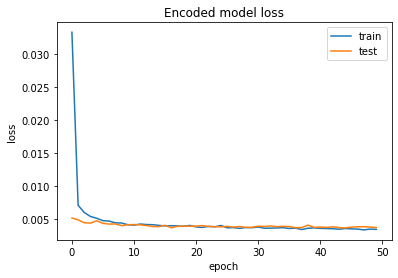

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9992977528089888


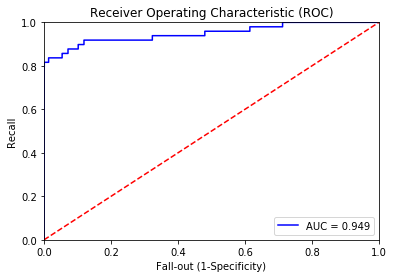

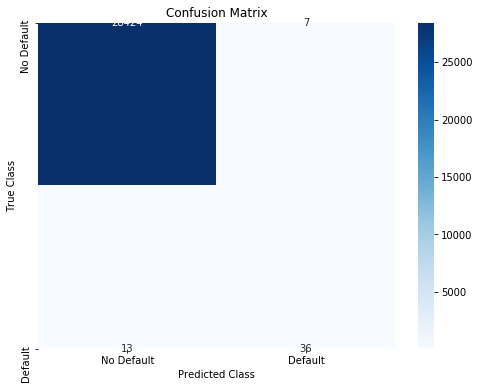

AUC(ROC): 0.8672238337141334
Precision: 0.8372093023255814
Recall: 0.7346938775510204
F1 score: 0.782608695652174
False positives: 7
True positives: 36
False negatives: 13
True negatives: 28424
Fold #9
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511803, 30)
After OverSampling, the shape of train_y: (511803,) 

After OverSampling, counts of label '1': 255919
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 22s 85us/step - loss: 0.0014 - val_loss: 2.4726e-04
Epoch 2/150
256327/256327 [==============================] - 21s 83us/step - loss: 1.7807e-04 - val_loss: 1.6091e-04
Epoch 3/150
256327/256327 [==============================] - 21s 83us/step - loss: 1.3651e-04 - val_loss: 1.2769e-04
Epoch 4/150
256327/256327 [==============================] - 22s 86us/step - loss: 1.1751e-04 - val_loss: 1.3823e-04
Epoch 5/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.0540e-04 - val_loss: 9.9242e-05
Epoch 6/150
256327/256327 [==============================] - 22s 87us/step - loss: 9.8890e-05 - val_loss: 9.3665e-05
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 21s 82us/step - loss: 3.8650e-05 - val_loss: 3.7141e-05
Epoch 69/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.8728e-05 - val_loss: 3.9995e-05
Epoch 70/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.8385e-05 - val_loss: 3.7670e-05
Epoch 71/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.8504e-05 - val_loss: 4.1779e-05
Epoch 72/150
256327/256327 [==============================] - 21s 81us/step - loss: 3.8085e-05 - val_loss: 3.9332e-05
Epoch 73/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.8327e-05 - val_loss: 3.6990e-05
Epoch 74/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.8247e-05 - val_loss: 3.4535e-05
Epoch 75/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.7627e-05 - val_loss: 4.1790e-05
Epoch 76/150
256327/256327 [==============================] - 22s 85u

256327/256327 [==============================] - 22s 85us/step - loss: 3.3150e-05 - val_loss: 3.1010e-05
Epoch 138/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.3099e-05 - val_loss: 4.4006e-05
Epoch 139/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.2999e-05 - val_loss: 3.4620e-05
Epoch 140/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.3094e-05 - val_loss: 3.3791e-05
Epoch 141/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.3496e-05 - val_loss: 3.5211e-05
Epoch 142/150
256327/256327 [==============================] - 21s 82us/step - loss: 3.2886e-05 - val_loss: 3.8620e-05
Epoch 143/150
256327/256327 [==============================] - 22s 85us/step - loss: 3.3035e-05 - val_loss: 3.1970e-05
Epoch 144/150
256327/256327 [==============================] - 22s 87us/step - loss: 3.2920e-05 - val_loss: 3.2604e-05
Epoch 145/150
256327/256327 [==============================] -

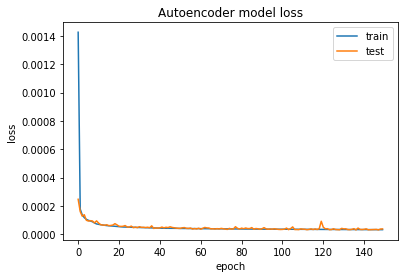

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 54s 210us/step - loss: 0.0402 - accuracy: 0.9881 - val_loss: 0.0052 - val_accuracy: 0.9992
Epoch 2/50
256327/256327 [==============================] - 52s 205us/step - loss: 0.0074 - accuracy: 0.9987 - val_loss: 0.0046 - val_accuracy: 0.9993
Epoch 3/50
256327/256327 [==============================] - 51s 199us/step - loss: 0.0060 - accuracy: 0.9989 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 4/50
256327/256327 [==============================] - 51s 198us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0044 - val_accuracy: 0.9993
Epoch 5/50
256327/256327 [==============================] - 51s 198us/step - loss: 0.0050 - accuracy: 0.9992 - val_loss: 0.0042 - val_accuracy: 0.9993
Epoch 6/50
256327/256327 [==============================] - 51s 198us/step - loss: 0.0049 - accuracy: 0.9992 - val_loss: 0.0043 - val_accuracy: 0.9993
Epoch 7/50
256327/256327 [=================

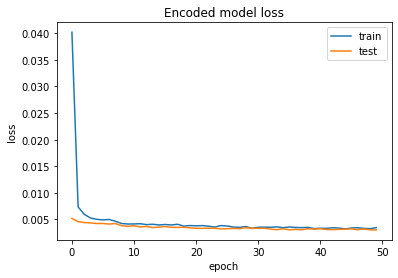

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9994733146067416


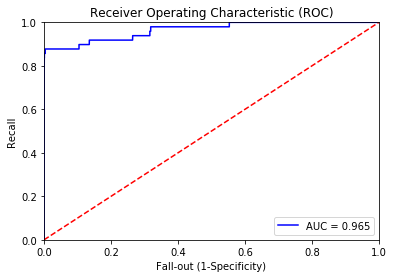

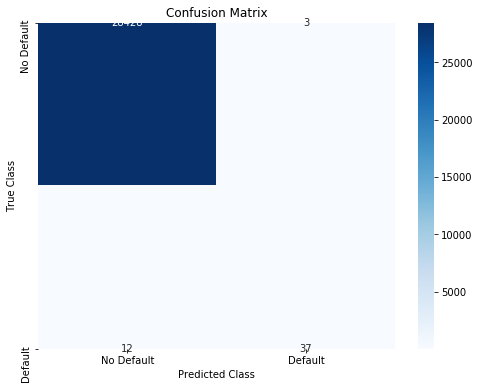

AUC(ROC): 0.8774982610961447
Precision: 0.925
Recall: 0.7551020408163265
F1 score: 0.8314606741573034
False positives: 3
True positives: 37
False negatives: 12
True negatives: 28428
Fold #10
Before OverSampling, counts of label '1': 492
Before OverSampling, counts of label '0': 284315 



F:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


After OverSampling, the shape of train_X: (511765, 30)
After OverSampling, the shape of train_y: (511765,) 

After OverSampling, counts of label '1': 255881
After OverSampling, counts of label '0': 255884
Train on 256327 samples, validate on 28480 samples
Epoch 1/150
256327/256327 [==============================] - 22s 87us/step - loss: 0.0013 - val_loss: 2.5786e-04
Epoch 2/150
256327/256327 [==============================] - 22s 85us/step - loss: 1.9513e-04 - val_loss: 1.5008e-04
Epoch 3/150
256327/256327 [==============================] - 22s 85us/step - loss: 1.3633e-04 - val_loss: 1.2224e-04
Epoch 4/150
256327/256327 [==============================] - 22s 87us/step - loss: 1.2234e-04 - val_loss: 1.1949e-04
Epoch 5/150
256327/256327 [==============================] - 23s 89us/step - loss: 1.1094e-04 - val_loss: 1.0470e-04
Epoch 6/150
256327/256327 [==============================] - 23s 89us/step - loss: 1.0157e-04 - val_loss: 1.0257e-04
Epoch 7/150
256327/256327 [===================

256327/256327 [==============================] - 23s 88us/step - loss: 3.9061e-05 - val_loss: 3.8698e-05
Epoch 69/150
256327/256327 [==============================] - 22s 88us/step - loss: 3.8942e-05 - val_loss: 4.0184e-05
Epoch 70/150
256327/256327 [==============================] - 22s 88us/step - loss: 3.8715e-05 - val_loss: 4.0140e-05
Epoch 71/150
256327/256327 [==============================] - 22s 88us/step - loss: 3.8592e-05 - val_loss: 3.9633e-05
Epoch 72/150
256327/256327 [==============================] - 23s 88us/step - loss: 3.8443e-05 - val_loss: 3.9065e-05
Epoch 73/150
256327/256327 [==============================] - 23s 88us/step - loss: 3.8457e-05 - val_loss: 4.7270e-05
Epoch 74/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.8090e-05 - val_loss: 3.9195e-05
Epoch 75/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.8234e-05 - val_loss: 3.4343e-05
Epoch 76/150
256327/256327 [==============================] - 22s 84u

256327/256327 [==============================] - 23s 89us/step - loss: 3.2976e-05 - val_loss: 3.4478e-05
Epoch 138/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.2817e-05 - val_loss: 3.1456e-05
Epoch 139/150
256327/256327 [==============================] - 23s 89us/step - loss: 3.2670e-05 - val_loss: 3.1520e-05
Epoch 140/150
256327/256327 [==============================] - 22s 86us/step - loss: 3.2700e-05 - val_loss: 4.8394e-05
Epoch 141/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.2552e-05 - val_loss: 3.2715e-05
Epoch 142/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.2617e-05 - val_loss: 3.9996e-05
Epoch 143/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.2736e-05 - val_loss: 3.9856e-05
Epoch 144/150
256327/256327 [==============================] - 22s 84us/step - loss: 3.2557e-05 - val_loss: 3.1723e-05
Epoch 145/150
256327/256327 [==============================] -

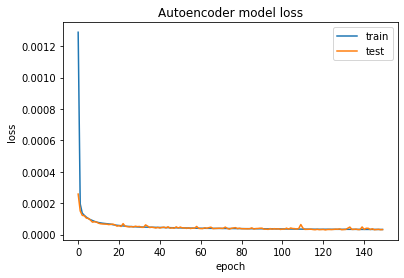

Train on 256327 samples, validate on 28480 samples
Epoch 1/50
256327/256327 [==============================] - 54s 212us/step - loss: 0.0250 - accuracy: 0.9944 - val_loss: 0.0040 - val_accuracy: 0.9993
Epoch 2/50
256327/256327 [==============================] - 53s 208us/step - loss: 0.0078 - accuracy: 0.9986 - val_loss: 0.0035 - val_accuracy: 0.9995
Epoch 3/50
256327/256327 [==============================] - 53s 205us/step - loss: 0.0064 - accuracy: 0.9988 - val_loss: 0.0039 - val_accuracy: 0.9992
Epoch 4/50
256327/256327 [==============================] - 53s 206us/step - loss: 0.0056 - accuracy: 0.9990 - val_loss: 0.0034 - val_accuracy: 0.9995
Epoch 5/50
256327/256327 [==============================] - 52s 204us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0033 - val_accuracy: 0.9995
Epoch 6/50
256327/256327 [==============================] - 51s 200us/step - loss: 0.0053 - accuracy: 0.9991 - val_loss: 0.0032 - val_accuracy: 0.9995
Epoch 7/50
256327/256327 [=================

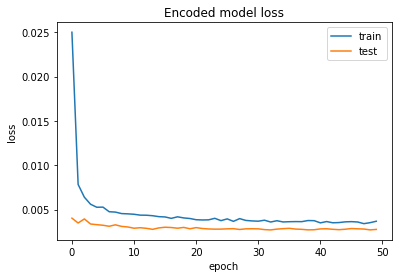

Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model: 0.9995786516853933


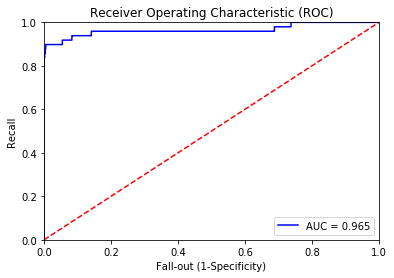

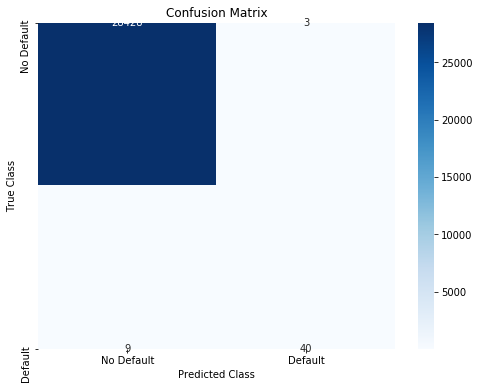

AUC(ROC): 0.9081105059941038
Precision: 0.9302325581395349
Recall: 0.8163265306122449
F1 score: 0.8695652173913043
False positives: 3
True positives: 40
False negatives: 9
True negatives: 28428


In [6]:
nb_epoch = 20
#batch_size = 256
input_dim = X.shape[1] #num of columns, 30
encoding_dim_1 = 27
encoding_dim_2 = 24
encoding_dim_3 = 21
hidden_dim = 15
learning_rate = 1e-7


#Cross_Validate

kf = StratifiedKFold(10, shuffle = True, random_state=42) # Use for Kfold Validation


tn_summary=[]
fp_summary=[]
fn_summary=[]
tp_summary=[]

def Average(lst): 
    return sum(lst) / len(lst)

fold = 0

for train, test in kf.split(X,y):
    fold +=1
    print(f"Fold #{fold}")
    
    x_train = X[train]
    y_train = y[train]
    x_test = X[test]
    y_test = y[test]
    
    
    print("Before OverSampling, counts of label '1': {}".format(sum(y==1)))
    print("Before OverSampling, counts of label '0': {} \n".format(sum(y==0)))

    sm = ADASYN(random_state=2)
    X_train_res, y_train_res = sm.fit_sample(x_train, y_train.ravel())

    print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
    print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

    print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
    print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))
    
    input_layer = Input(shape=(input_dim, ))

    encoder = Dense(encoding_dim_1, activation="elu", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
    encoder = Dense(encoding_dim_2, activation = "elu")(encoder)
    encoder = Dense(encoding_dim_3, activation = "elu")(encoder)

    encoder = Dense(hidden_dim, activation="elu")(encoder)

    decoder = Dense(encoding_dim_3, activation = "elu")(encoder)
    decoder = Dense(encoding_dim_2, activation = "elu")(decoder)
    decoder = Dense(encoding_dim_1, activation = "elu")(decoder)
    decoder = Dense(input_dim, activation="elu")(decoder)

    autoencoder = Model(inputs=input_layer, outputs=decoder)
    
    # Create the autoencoder model
    autoencoder = Model(input_layer, decoder)
    #Compile the autoencoder model
    autoencoder.compile(optimizer='adam',loss='mean_squared_error')
    #Fit to train set and save to hist_auto for plotting purposes
    hist_auto = autoencoder.fit(x_train, x_train,epochs=150,shuffle=True,validation_data=(x_test, x_test))
    
    
    # Summarize history for loss
    plt.figure()
    plt.plot(hist_auto.history['loss'])
    plt.plot(hist_auto.history['val_loss'])
    plt.title('Autoencoder model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    # Create a separate model (encoder) in order to make encodings (first part of the autoencoder model)
    encoder_model = Model(input_layer, encoder)
    # Create a placeholder for an encoded input
    encoded_input = Input(shape=(hidden_dim,))
    
    #Encode data set from above using the encoder
    encoded_train_x = encoder_model.predict(x_train)
    encoded_test_x = encoder_model.predict(x_test)
    #Reshape data for the CNN model
    encoded_train_x = encoded_train_x.reshape(encoded_train_x.shape[0],encoded_train_x.shape[1], 1)
    encoded_test_x = encoded_test_x.reshape(encoded_test_x.shape[0], encoded_test_x.shape[1], 1)
    encoded_train_x.shape

    epochs = 50
    model = Sequential()
    model.add(Conv1D(32, 2, activation='relu', input_shape = encoded_train_x[1].shape))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.2))

    model.add(Conv1D(64, 2, activation='relu'))
    model.add(BatchNormalization())
    model.add(MaxPool1D(2))
    model.add(Dropout(0.5))

    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(1, activation='sigmoid'))

    model.compile(optimizer=Adam(lr=0.0001), loss = 'binary_crossentropy',metrics=['accuracy'])
    history = model.fit(encoded_train_x, y_train,epochs=epochs,validation_data=(encoded_test_x, y_test), verbose=1)
    
    # Summarize history for loss
    plt.figure()
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Encoded model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper right')
    plt.show()
    
    predictions_CNN_prob = model.predict(encoded_test_x)
    predictions_CNN_prob = predictions_CNN_prob[:,0]
    predictions_CNN_01 = np.where(predictions_CNN_prob > 0.5, 1, 0) #Turn probability to 0-1 binary output
    #Print accuracy
    acc_CNN = accuracy_score(y_test, predictions_CNN_01)
    print('Overall accuracy of SMOTE - Deep Autoencoder - Convolutional Neural Network model:', acc_CNN)
    #Print Area Under Curve
    false_positive_rate, recall, thresholds = roc_curve(y_test,predictions_CNN_prob)
    roc_auc = auc(false_positive_rate, recall)
    plt.figure()
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, recall, 'b', label = 'AUC = %0.3f' %roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1], [0,1], 'r--')
    plt.xlim([0.0,1.0])
    plt.ylim([0.0,1.0])
    plt.ylabel('Recall')
    plt.xlabel('Fall-out (1-Specificity)')
    plt.show()
    #Print Confusion Matrix
    cm = confusion_matrix(y_test, predictions_CNN_01)
    labels = ['No Default', 'Default']
    plt.figure(figsize=(8,6))
    sns.heatmap(cm,xticklabels=labels, yticklabels=labels, annot=True, fmt='d',cmap="Blues", vmin = 0.2);
    plt.title('Confusion Matrix')
    plt.ylabel('True Class')
    plt.xlabel('Predicted Class')
    plt.show()
    
    print("AUC(ROC): " + str(metrics.roc_auc_score(y_test, predictions_CNN_01)))
    print("Precision: " + str(metrics.precision_score(y_test, predictions_CNN_01)))
    print("Recall: " + str(metrics.recall_score(y_test, predictions_CNN_01)))
    print("F1 score: " + str(metrics.f1_score(y_test, predictions_CNN_01)))

    tn, fp, fn, tp = metrics.confusion_matrix(y_test, predictions_CNN_01).ravel()

    print("False positives: " + str(fp))
    print("True positives: " + str(tp))
    print("False negatives: " + str(fn))
    print("True negatives: " + str(tn))
    
    tn_summary.append(tn)
    fp_summary.append(fp)
    fn_summary.append(fn)
    tp_summary.append(tp)



In [7]:
print(" Average tn = " + str(Average(tn_summary)))
print(" Average fp = " + str(Average(fp_summary)))
print(" Average fn = "+ str(Average(fn_summary)))    
print(" Average tp = "+ str(Average(tp_summary)))   


Average_precision = Average(tp_summary)/(Average(tp_summary)+Average(fp_summary))
Average_recall = Average(tp_summary)/(Average(tp_summary)+Average(fn_summary))
Average_f1_score = 2*Average_precision*Average_recall/(Average_precision + Average_recall)

print(" Average Precision = " + str(Average_precision))

print(" Average Recall = " + str(Average_recall))

print(" Average F1 score = " + str(Average_f1_score))

 Average tn = 28426.1
 Average fp = 5.4
 Average fn = 11.2
 Average tp = 38.0
 Average Precision = 0.8755760368663594
 Average Recall = 0.7723577235772358
 Average F1 score = 0.8207343412526997


In [8]:
total_tn=0
total_fp=0
total_fn=0
total_tp=0

for i in tn_summary:
    total_tn = total_tn + i

for j in fp_summary:
    total_fp = total_fp + j
    
for x in fn_summary:
    total_fn = total_fn + x
    
for y in tp_summary:
    total_tp = total_tp + y

print(" Total tn: " + str(total_tn))
print(" Total fp: " + str(total_fp))
print(" Total fn: " + str(total_fn))
print(" Total tp: " + str(total_tp))


Total_Precision = total_tp/(total_tp + total_fp)
Total_Recall = total_tp/(total_tp+ total_fn)

Total_F1_score = 2*Total_Precision*Total_Recall/(Total_Precision + Total_Recall)

print(" Total Precision = " + str(Total_Precision))
print(" Total Recall = " + str(Total_Recall))
print(" Total F1_score = " + str(Total_F1_score))

 Total tn: 284261
 Total fp: 54
 Total fn: 112
 Total tp: 380
 Total Precision = 0.8755760368663594
 Total Recall = 0.7723577235772358
 Total F1_score = 0.8207343412526997


In [9]:

print("--- %s seconds ---" % (time.time() - start_time))

Total_time = (time.time()-start_time)

print(Total_time)

--- 58020.653107881546 seconds ---
58020.65510749817


In [10]:
Total_time_hours = Total_time/3600

print(Total_time_hours)

16.116848640971714
